# **Scrapping**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #masukan modul yang dibutuhkan
import pandas as pd
import numpy as np
import nltk
import string
import re

In [ ]:
#masukan data kembali yang akan diproses
def load_data():
    data_content = pd.read_csv('/content/drive/MyDrive/SKRIPSI/reviewrating_Noice_Data.csv')
    return data_content

df = load_data()
df.head()

,Unnamed: 0,Review,Rating
0,0,Suka banget dengerin podcast moybi,5
1,1,tidak ada komik,1
2,2,radio vavorit,5
3,3,Padahal content nya Bagus² tapi sayang loading...,3
4,4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,5


In [ ]:
df = pd.DataFrame(df['Review'])
df.head()

,Review
0,Suka banget dengerin podcast moybi
1,tidak ada komik
2,radio vavorit
3,Padahal content nya Bagus² tapi sayang loading...
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...


# **Cleaning**

In [ ]:
#cleaning
def cleaning(content):
    content = re.sub(r'\$\w*', '', str(content))         #digunakan untuk menghapus semua kata yang dimulai dengan tanda dolar ($) dan diikuti oleh karakter huruf, angka, atau garis bawah.      #
    content = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', content)     #untuk menghapus semua URL atau tautan web dari teks.
    content = re.sub('&quot;'," ", content)         #Digunakan untuk menggantikan setiap kemunculan `&quot;` dengan spasi kosong dalam kolom `text`.
    content = re.sub(r"\d+", " ", str(content))         #digunakan untuk menggantikan semua angka dalam teks yang disimpan dalam kolom `text` dengan spasi kosong.
    content = re.sub(r"\b[a-zA-Z]\b", "", str(content))     #digunakan untuk menghapus semua kata tunggal dalam teks yang disimpan dalam kolom `text`.
    content = re.sub(r"[^\w\s]", " ", str(content))         #digunakan untuk menggantikan semua karakter non-alphanumerik dan non-spasi dalam teks yang disimpan dalam variabel `content` dengan spasi kosong.
    content = re.sub(r'(.)\1+', r'\1\1', content)         #Digunakan untuk mengganti dua atau lebih karakter berulang dalam teks dengan hanya dua karakter yang berulang. Misalnya, jika terdapat karakter berulang "eeeee" dalam teks, maka akan digantikan dengan "ee".
    content = re.sub(r"\s+", " ", str(content))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    content = re.sub(r'#', '', content)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    content = re.sub(r'[^a-zA-z0-9]', ' ', str(content))    #Digunakan untuk menggantikan semua karakter non-alphanumerik dalam teks dengan spasi kosong, sehingga menghapus karakter-karakter tersebut dari teks dan mempertahankan hanya huruf (kapital dan kecil) serta angka.
    content = re.sub(r'\b\w{1,2}\b', '', content)     #digunakan untuk menghapus kata-kata dengan panjang satu atau dua karakter dalam teks
    content = re.sub(r'\s\s+', ' ', content)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    content = re.sub(r'^RT[\s]+', '', content)        #menghapus RT
    content = re.sub(r'^b[\s]+', '', content)       #digunakan untuk menghapus spasi di awal teks
    content = re.sub(r'^link[\s]+', '', content)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks
    return content

def remove_emoji(content):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', content)

df['cleaning'] = df['Review'].apply(cleaning)
df.head(10)

,Review,cleaning
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi
1,tidak ada komik,tidak ada komik
2,radio vavorit,radio vavorit
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...
5,Kenapa setiap keluar dari aplikasi noice selal...,Kenapa setiap keluar dari aplikasi noice selal...
6,Josss,Joss
7,"Dari awal taunya ini platform audio, harusnya ...",Dari awal taunya ini platform audio harusnya p...
8,keren,keren
9,AKU CINTA NOICE !!!,AKU CINTA NOICE


# **Case Folding**

In [ ]:
#case folding - ubah jadi huruf kecil
df['case_folding'] = df['cleaning'].str.lower()
df.head(10)

,Review,cleaning,case_folding
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi
1,tidak ada komik,tidak ada komik,tidak ada komik
2,radio vavorit,radio vavorit,radio vavorit
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...,padahal content nya bagus tapi sayang loading ...
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...,dulu saya insyaallah noice karna ada coki musl...
5,Kenapa setiap keluar dari aplikasi noice selal...,Kenapa setiap keluar dari aplikasi noice selal...,kenapa setiap keluar dari aplikasi noice selal...
6,Josss,Joss,joss
7,"Dari awal taunya ini platform audio, harusnya ...",Dari awal taunya ini platform audio harusnya p...,dari awal taunya ini platform audio harusnya p...
8,keren,keren,keren
9,AKU CINTA NOICE !!!,AKU CINTA NOICE,aku cinta noice


# **Tokenize**

In [ ]:
#tokenisasi - membagi kalimat jadi perkata (dipisah)
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(content):
    return word_tokenize(content)

df['tokenisasi'] = df['case_folding'].apply(lambda x: word_tokenize_wrapper(x.lower()))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Review,cleaning,case_folding,tokenisasi
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi,"[suka, banget, dengerin, podcast, moybi]"
1,tidak ada komik,tidak ada komik,tidak ada komik,"[tidak, ada, komik]"
2,radio vavorit,radio vavorit,radio vavorit,"[radio, vavorit]"
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...,padahal content nya bagus tapi sayang loading ...,"[padahal, content, nya, bagus, tapi, sayang, l..."
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...,dulu saya insyaallah noice karna ada coki musl...,"[dulu, saya, insyaallah, noice, karna, ada, co..."


# **Normalisasi**

In [ ]:
#Normalisasi-menormalisasikan kata yang non formal menjadi formal sesuai dengan kamus colloquial-indonesian-lexicon
def normalization (content):
  content_slang = pd.read_csv('/content/drive/MyDrive/TA_SVM/colloquial-indonesian-lexicon.csv')
  dict_slang ={}
  for i in range(content_slang.shape[0]):
    dict_slang[content_slang["slang"][i]]=content_slang["formal"][i]

  drop_slang = []
  for teks in content:
    normalisasi_teks = [dict_slang[word] if word in dict_slang.keys() else word for word in teks]
    drop_slang.append(normalisasi_teks)

  return drop_slang

df['normalisasi'] = normalization(df['tokenisasi'])
df.head()

,Review,cleaning,case_folding,tokenisasi,normalisasi
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi,"[suka, banget, dengerin, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]"
1,tidak ada komik,tidak ada komik,tidak ada komik,"[tidak, ada, komik]","[tidak, ada, komik]"
2,radio vavorit,radio vavorit,radio vavorit,"[radio, vavorit]","[radio, vavorit]"
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...,padahal content nya bagus tapi sayang loading ...,"[padahal, content, nya, bagus, tapi, sayang, l...","[padahal, content, nya, bagus, tapi, sayang, l..."
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...,dulu saya insyaallah noice karna ada coki musl...,"[dulu, saya, insyaallah, noice, karna, ada, co...","[dulu, saya, insyaallah, noice, karena, ada, c..."


# **Stopword Romoval**

In [ ]:
#stopword removal - menghapus kata sesuai dengan kamus indonesia
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

#tambahan kata
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'gt', 'klo',
                       'kalo', 'amp', 'biar', 'xad', 'xef',
                       'gak', 'xbc', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'xae', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'xbb', 'xb', 'sch',
                       'injirrr', 'ah', 'oena', 'bu', 'eh', 'xac', 'anjir'])

list_stopwords = set(list_stopwords)

def stopwords_removal(content):
  return [word for word in content if word not in list_stopwords]

df['stopword_removal'] = df['normalisasi'].apply(stopwords_removal)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi,"[suka, banget, dengerin, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]"
1,tidak ada komik,tidak ada komik,tidak ada komik,"[tidak, ada, komik]","[tidak, ada, komik]",[komik]
2,radio vavorit,radio vavorit,radio vavorit,"[radio, vavorit]","[radio, vavorit]","[radio, vavorit]"
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...,padahal content nya bagus tapi sayang loading ...,"[padahal, content, nya, bagus, tapi, sayang, l...","[padahal, content, nya, bagus, tapi, sayang, l...","[content, bagus, sayang, loading, banget]"
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...,dulu saya insyaallah noice karna ada coki musl...,"[dulu, saya, insyaallah, noice, karna, ada, co...","[dulu, saya, insyaallah, noice, karena, ada, c...","[insyaallah, noice, coki, muslim, bareng, noic..."


# **Stemming**

In [ ]:
#stemming - menghapus imbuhan
!pip install swifter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

#buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed wrapper
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for content in df['stopword_removal']:
    for term in content:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

#memmulai stemming
def apply_stemmed_term(full_text):
  return [term_dict[term] for term in full_text]

df['stemming'] = df['stopword_removal'].swifter.apply(apply_stemmed_term)
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=47953b5b13fe8cc8f33fc69c93791b8fa1432fa5727a415b11613e45b355c68f
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00
2274
------------------------
suka : suka
banget : banget
mendengarkan : dengar
podcast : podcast
moybi : moybi
komik : komik
radio : radio
vavorit : vavorit
content : content
bagus : bagus
sayang : sayang
loading : loading
insyaallah : insyaallah
noice : noice
coki : cok
muslim : muslim
bareng : bareng
uninstall : uninstall
install : install
daddy : daddy
issues : issues
aplikasi : aplikasi
kayak : kayak
mengulang : ulang
kontenya : konte
premium : premium
mengangu : mengangu
tolong : tolong
perbaiki : bai

Pandas Apply:   0%|          | 0/1912 [00:00<?, ?it/s]

,Review,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi,"[suka, banget, dengerin, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]","[suka, banget, dengar, podcast, moybi]"
1,tidak ada komik,tidak ada komik,tidak ada komik,"[tidak, ada, komik]","[tidak, ada, komik]",[komik],[komik]
2,radio vavorit,radio vavorit,radio vavorit,"[radio, vavorit]","[radio, vavorit]","[radio, vavorit]","[radio, vavorit]"
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...,padahal content nya bagus tapi sayang loading ...,"[padahal, content, nya, bagus, tapi, sayang, l...","[padahal, content, nya, bagus, tapi, sayang, l...","[content, bagus, sayang, loading, banget]","[content, bagus, sayang, loading, banget]"
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...,dulu saya insyaallah noice karna ada coki musl...,"[dulu, saya, insyaallah, noice, karna, ada, co...","[dulu, saya, insyaallah, noice, karena, ada, c...","[insyaallah, noice, coki, muslim, bareng, noic...","[insyaallah, noice, cok, muslim, bareng, noice..."


In [ ]:
#buat stemming bebas dari kurung siku
stemming = df[['stemming']]

def fit_stemming(content):
    content = np.array(content)
    content = ' '.join(content)

    return content

df['stemming'] = df['stemming'].apply(lambda x: fit_stemming(x))
df.head()

,Review,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi,"[suka, banget, dengerin, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]",suka banget dengar podcast moybi
1,tidak ada komik,tidak ada komik,tidak ada komik,"[tidak, ada, komik]","[tidak, ada, komik]",[komik],komik
2,radio vavorit,radio vavorit,radio vavorit,"[radio, vavorit]","[radio, vavorit]","[radio, vavorit]",radio vavorit
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...,padahal content nya bagus tapi sayang loading ...,"[padahal, content, nya, bagus, tapi, sayang, l...","[padahal, content, nya, bagus, tapi, sayang, l...","[content, bagus, sayang, loading, banget]",content bagus sayang loading banget
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...,dulu saya insyaallah noice karna ada coki musl...,"[dulu, saya, insyaallah, noice, karna, ada, co...","[dulu, saya, insyaallah, noice, karena, ada, c...","[insyaallah, noice, coki, muslim, bareng, noic...",insyaallah noice cok muslim bareng noice unins...


In [ ]:
#remove kalimat duplikat dari kolom stemming
df.drop_duplicates(subset = "stemming", keep = 'first', inplace = True)
df.head()

,Review,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi,"[suka, banget, dengerin, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]","[suka, banget, mendengarkan, podcast, moybi]",suka banget dengar podcast moybi
1,tidak ada komik,tidak ada komik,tidak ada komik,"[tidak, ada, komik]","[tidak, ada, komik]",[komik],komik
2,radio vavorit,radio vavorit,radio vavorit,"[radio, vavorit]","[radio, vavorit]","[radio, vavorit]",radio vavorit
3,Padahal content nya Bagus² tapi sayang loading...,Padahal content nya Bagus tapi sayang loading ...,padahal content nya bagus tapi sayang loading ...,"[padahal, content, nya, bagus, tapi, sayang, l...","[padahal, content, nya, bagus, tapi, sayang, l...","[content, bagus, sayang, loading, banget]",content bagus sayang loading banget
4,Dulu saya insyaallah NOICE karna ada Coki-Musl...,Dulu saya insyaallah NOICE karna ada Coki Musl...,dulu saya insyaallah noice karna ada coki musl...,"[dulu, saya, insyaallah, noice, karna, ada, co...","[dulu, saya, insyaallah, noice, karena, ada, c...","[insyaallah, noice, coki, muslim, bareng, noic...",insyaallah noice cok muslim bareng noice unins...


In [ ]:
#simpan kedalam csv
df.to_csv('preprocessing.csv', sep=',', index=False)

# **LABELING**


In [ ]:
#modul yang dibutuhkan untuk translate
!pip install googletrans==3.1.0a0
import pandas as pd
import googletrans
from googletrans import Translator
translator = Translator()
pd.set_option('max_colwidth', 300)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=d1ce57c28e7d8d8065767aa2a20a9bc1b1a489c13318bb2c1344735ea455bf55
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
#import modul yang dibuthkan labelin vader
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#masukan data hasil preprocessing
df = pd.read_csv('/content/drive/MyDrive/TA_SVM/preprocessing.csv')
df.head()

,Review,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,Suka banget dengerin podcast moybi,Suka banget dengerin podcast moybi,suka banget dengerin podcast moybi,"['suka', 'banget', 'dengerin', 'podcast', 'moybi']","['suka', 'banget', 'mendengarkan', 'podcast', 'moybi']","['suka', 'banget', 'mendengarkan', 'podcast', 'moybi']",suka banget dengar podcast moybi
1,tidak ada komik,tidak ada komik,tidak ada komik,"['tidak', 'ada', 'komik']","['tidak', 'ada', 'komik']",['komik'],komik
2,radio vavorit,radio vavorit,radio vavorit,"['radio', 'vavorit']","['radio', 'vavorit']","['radio', 'vavorit']",radio vavorit
3,Padahal content nya Bagus² tapi sayang loading nya lama banget.,Padahal content nya Bagus tapi sayang loading nya lama banget,padahal content nya bagus tapi sayang loading nya lama banget,"['padahal', 'content', 'nya', 'bagus', 'tapi', 'sayang', 'loading', 'nya', 'lama', 'banget']","['padahal', 'content', 'nya', 'bagus', 'tapi', 'sayang', 'loading', 'nya', 'lama', 'banget']","['content', 'bagus', 'sayang', 'loading', 'banget']",content bagus sayang loading banget
4,"Dulu saya insyaallah NOICE karna ada Coki-Muslim, setelah mereka gak bareng lagi NOICE saya uninstall, sekarang install lagi karna suka sama Daddy Issues",Dulu saya insyaallah NOICE karna ada Coki Muslim setelah mereka gak bareng lagi NOICE saya uninstall sekarang install lagi karna suka sama Daddy Issues,dulu saya insyaallah noice karna ada coki muslim setelah mereka gak bareng lagi noice saya uninstall sekarang install lagi karna suka sama daddy issues,"['dulu', 'saya', 'insyaallah', 'noice', 'karna', 'ada', 'coki', 'muslim', 'setelah', 'mereka', 'gak', 'bareng', 'lagi', 'noice', 'saya', 'uninstall', 'sekarang', 'install', 'lagi', 'karna', 'suka', 'sama', 'daddy', 'issues']","['dulu', 'saya', 'insyaallah', 'noice', 'karena', 'ada', 'coki', 'muslim', 'setelah', 'mereka', 'enggak', 'bareng', 'lagi', 'noice', 'saya', 'uninstall', 'sekarang', 'install', 'lagi', 'karena', 'suka', 'sama', 'daddy', 'issues']","['insyaallah', 'noice', 'coki', 'muslim', 'bareng', 'noice', 'uninstall', 'install', 'suka', 'daddy', 'issues']",insyaallah noice cok muslim bareng noice uninstall install suka daddy issues


In [ ]:
# cari bahasa
lang_df = pd.DataFrame.from_dict(googletrans.LANGUAGES,  orient='index', columns=['Language'])
lang_df.head()

,Language
af,afrikaans
sq,albanian
am,amharic
ar,arabic
hy,armenian


In [ ]:
# cari code indonesia, dan inggris
lang_df[lang_df.Language.isin(['english', 'indonesian'])]

,Language
en,english
id,indonesian


In [ ]:
translate = pd.DataFrame(df['stemming']) #disini labelin menggunakan kolom stemming/hasil akhir dari preprocessing data
translate['english_stemming'] = translate['stemming'].apply(lambda x: translator.translate(x, src='id', dest='en').text)
translate.head()

,stemming,english_stemming
0,suka banget dengar podcast moybi,really like listening to the moybi podcast
1,komik,comic
2,radio vavorit,favorite radio
3,content bagus sayang loading banget,"Good content, unfortunately it loads a lot"
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"God willing, noice cok Muslims together with noice uninstall install like daddy issues"


In [ ]:
#proses pengskoran/pembobotan kata

sid.polarity_scores(translate.loc[0]['english_stemming'])
translate['scores'] = translate['english_stemming'].apply(lambda x : sid.polarity_scores(str(x)))
translate.head()

,stemming,english_stemming,scores
0,suka banget dengar podcast moybi,really like listening to the moybi podcast,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}"
1,komik,comic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,radio vavorit,favorite radio,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}"
3,content bagus sayang loading banget,"Good content, unfortunately it loads a lot","{'neg': 0.258, 'neu': 0.43, 'pos': 0.312, 'compound': 0.128}"
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"God willing, noice cok Muslims together with noice uninstall install like daddy issues","{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.5574}"


In [ ]:
#penjumlahan skor
translate['compound']  = translate['scores'].apply(lambda score_dict: score_dict['compound'])

translate.head()

,stemming,english_stemming,scores,compound
0,suka banget dengar podcast moybi,really like listening to the moybi podcast,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}",0.4201
1,komik,comic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,radio vavorit,favorite radio,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}",0.4588
3,content bagus sayang loading banget,"Good content, unfortunately it loads a lot","{'neg': 0.258, 'neu': 0.43, 'pos': 0.312, 'compound': 0.128}",0.1280
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"God willing, noice cok Muslims together with noice uninstall install like daddy issues","{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.5574}",0.5574


In [ ]:
#pelabelan skor dengan 2 kelas
def condition(c):
    if c>=0.0000:
        return "positif"
    else:
        return 'negatif'

translate['sentimen'] = translate['compound'].apply(condition)

translate.head()

,stemming,english_stemming,scores,compound,sentimen
0,suka banget dengar podcast moybi,really like listening to the moybi podcast,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}",0.4201,positif
1,komik,comic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,positif
2,radio vavorit,favorite radio,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}",0.4588,positif
3,content bagus sayang loading banget,"Good content, unfortunately it loads a lot","{'neg': 0.258, 'neu': 0.43, 'pos': 0.312, 'compound': 0.128}",0.1280,positif
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"God willing, noice cok Muslims together with noice uninstall install like daddy issues","{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.5574}",0.5574,positif


In [ ]:
#menghapus kolom translate
del(translate["english_stemming"])
translate.head()

,stemming,scores,compound,sentimen
0,suka banget dengar podcast moybi,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}",0.4201,positif
1,komik,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,positif
2,radio vavorit,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}",0.4588,positif
3,content bagus sayang loading banget,"{'neg': 0.258, 'neu': 0.43, 'pos': 0.312, 'compound': 0.128}",0.1280,positif
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.5574}",0.5574,positif


In [ ]:
#simpan kedalam csv
translate.to_csv('/content/drive/MyDrive/TA_SVM/labelin_sentimen.csv', sep=',', index=False)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TA_SVM/labelin_sentimen.csv')
df.head()

,stemming,scores,compound,sentimen
0,suka banget dengar podcast moybi,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}",0.4201,positif
1,komik,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,positif
2,radio vavorit,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}",0.4588,positif
3,content bagus sayang loading banget,"{'neg': 0.258, 'neu': 0.43, 'pos': 0.312, 'compound': 0.128}",0.1280,positif
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.5574}",0.5574,positif


In [ ]:
#konversi sentiment ke polaritas
def convert(polarity):
    if polarity == 'positif':
        return 1
    else:
        return -1

df['polarity'] = df['sentimen'].apply(convert)
df.head()

,stemming,scores,compound,sentimen,polarity
0,suka banget dengar podcast moybi,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}",0.4201,positif,1
1,komik,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,positif,1
2,radio vavorit,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}",0.4588,positif,1
3,content bagus sayang loading banget,"{'neg': 0.258, 'neu': 0.43, 'pos': 0.312, 'compound': 0.128}",0.1280,positif,1
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.5574}",0.5574,positif,1


In [ ]:
#save file polarity
df.to_csv('data_klasifikasi.csv', sep=',', index=False)

In [ ]:
#melihat banyak sentimen pada kolom label
df['sentimen'].value_counts()

sentimen
positif    1184
negatif     268
Name: count, dtype: int64

In [ ]:
#jumlah data
df.shape

(1452, 5)

# **KLASIFIKASI**

In [ ]:
#masukan data yang sudah disave tadi
df = pd.read_csv('/content/drive/MyDrive/TA_SVM/data_klasifikasi.csv', encoding = 'utf-8')
df.head()

,stemming,scores,compound,sentimen,polarity
0,suka banget dengar podcast moybi,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4201}",0.4201,positif,1
1,komik,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,positif,1
2,radio vavorit,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}",0.4588,positif,1
3,content bagus sayang loading banget,"{'neg': 0.258, 'neu': 0.43, 'pos': 0.312, 'compound': 0.128}",0.1280,positif,1
4,insyaallah noice cok muslim bareng noice uninstall install suka daddy issues,"{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.5574}",0.5574,positif,1


# **SPLIT DATA (TF-IDF)**

In [ ]:
#Set nilai X dan Y
X = df['stemming']
y = df['polarity']

rasio 70:30

In [ ]:
#spliting data untuk data train dan data test
from sklearn.model_selection import train_test_split
#pengujian dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=386)

# **KLASIFIKASI SVM**

In [ ]:
#KLASIFIKASI SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train.values.astype('U'))
X_test_tfidf = vectorizer.transform(X_test)

# Klasifikasi SVM dengan kernel linear
svm = SVC(kernel='linear')

svm.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data test dengan SVM
y_pred = svm.predict(X_test_tfidf)

# Lihat clasification report
print(classification_report(y_test, y_pred))


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

              precision    recall  f1-score   support

          -1       0.67      0.30      0.41        47
           1       0.88      0.97      0.92       244

    accuracy                           0.86       291
   macro avg       0.77      0.63      0.67       291
weighted avg       0.84      0.86      0.84       291

Akurasi: 0.8625429553264605


In [ ]:
len(X_train) #jumlah data train

1161

# **Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

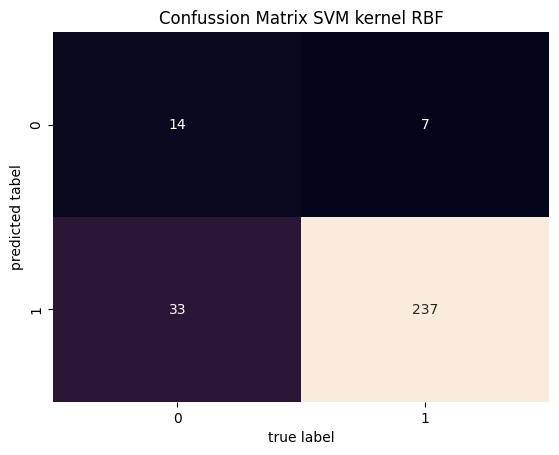

In [ ]:
plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix SVM kernel Linier')
plt.xlabel('true label')
plt.ylabel('predicted tabel')
plt.show()

# PERBANDINGAN RASIO SPLIT DATA

Rasio 60:40

In [ ]:
#spliting data untuk data train dan data test
from sklearn.model_selection import train_test_split
#pengujian dengan perbandingan 60:40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix SVM kernel Linier')
plt.xlabel('true label')
plt.ylabel('predicted tabel')
plt.show()

Rasio 80:20

In [ ]:
#spliting data untuk data train dan data test
from sklearn.model_selection import train_test_split
#pengujian dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix SVM kernel linie')
plt.xlabel('true label')
plt.ylabel('predicted tabel')
plt.show()